# Photometry data analysis notebook

In [1]:
from photometry import analysis
import matplotlib.pyplot as plt
import warnings
from scipy.ndimage import gaussian_filter1d


Ignore the cell immediately below (for development purposes only)

In [2]:
%reload_ext autoreload 
%autoreload 2

Load plotting parameters

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 7})
warnings.simplefilter("ignore", UserWarning)

Load doric files. Make sure you change the filepath names accordingly. 

In [4]:
#COMMENT OUT if you don't have a saline trace
saline_file = '../data/M91_saline_0001.doric'

#COMMENT OUT if you don't have a CNO trace
cno_file = '../data/M91_CNO_0001.doric'

#COMMENT OUT if you don't have a compound trace
compound_file = '../data/M91_X_0001.doric'

## Plot df/f with no filtering

Set preinjection interval. ```minutes_before_ttl_pulse``` is the number of timepoints you want subtracted from the trace prior to a TTL pulse. If you don't administer a TTL pulse, leave at 0. 

In [12]:
#EDIT: mean signal of minutes before TTL pulse subtracted from trace
minutes_before_ttl_pulse = 0 

#DO NOT EDIT: calculate pre-injection interval
freq = 0.0166 #data collection frequency in Hz
pre_injection_interval = int((minutes_before_ttl_pulse)/freq) #convert pre-injection interval (min) to data collection timepoints

Compute df/f

In [14]:
#COMMENT OUT if you don't have a saline trace
saline_df_f = analysis.get_df_f_from_doric(saline_file, z_norm=True, subtract_pre_inj=pre_injection_interval)

#COMMENT OUT if you don't have a CNO trace
cno_df_f = analysis.get_df_f_from_doric(cno_file,z_norm=True, subtract_pre_inj=pre_injection_interval)

#COMMENT OUT if you don't have a compound trace
compound_df_f = analysis.get_df_f_from_doric(compound_file,z_norm=True, subtract_pre_inj=pre_injection_interval)

Plotting

Text(0.5, 0, 'Time (s)')

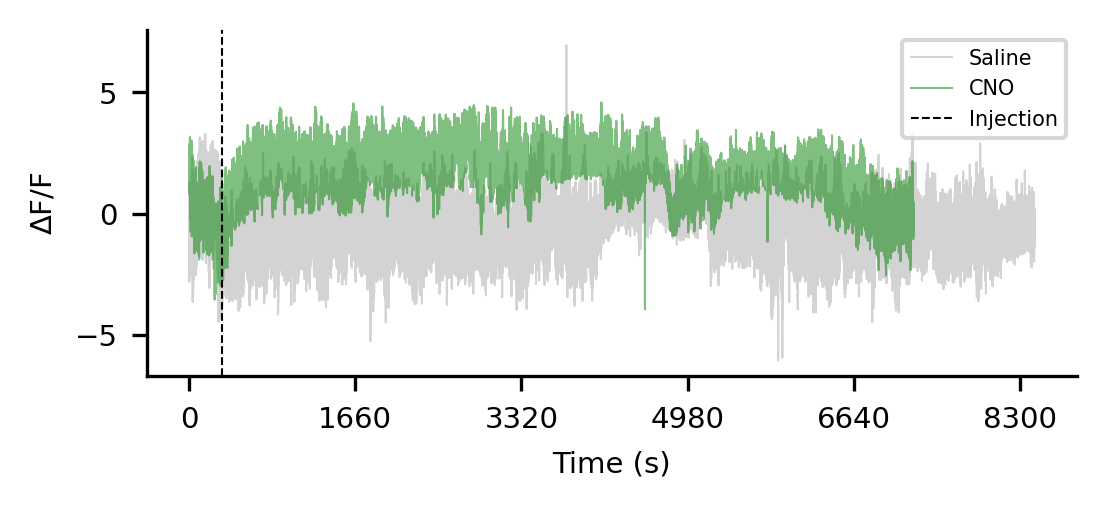

In [6]:
#DO NOT EDIT: set plotting parameters
linewidth=.5
fig, ax = plt.subplots(figsize=(4,1.5))
ax.spines[['right','top']].set_visible(False)
ax.set_ylabel(r'$\Delta$F/F')
ax.vlines(pre_injection_interval,  
           ymin = 0, ymax = 1, color = 'k', linewidth=linewidth, linestyle = '--', 
           transform=ax.get_xaxis_transform(), label='Injection')
ax.set_xlabel('Time (min.)')

#COMMEND OUT if you don't have a saline trace
ax.plot(saline_df_f, linewidth=linewidth, color='lightgray',label='Saline')

#COMMENT OUT if you don't have a CNO trace
ax.plot(cno_df_f, linewidth=linewidth, color='g',label='CNO', alpha=0.5)

#COMMENT OUT if you don't have a compound trace. If you do have a compound trace, replace 'Compound' with the name of your compound. 
ax.plot(compound_df_f, linewidth=linewidth, color='b',label='Compound', alpha=0.5)


#DO NOT EDIT: set x axis labels and add legend
ax.set_xticklabels([int(val*freq) for val in ax.get_xticks()])
ax.legend(fontsize=5)


## Plot df/f with Gaussian smoothing

Compute smoothed traces

In [7]:
#EDIT: set value of Gaussian kernel width. Higher = more smoothed. 
filter_val=1000 

In [ ]:
#DO NOT EDIT: compute filtered data
saline_df_f_filt = gaussian_filter1d(saline_df_f, filter_val)
cno_df_f_filt = gaussian_filter1d(cno_df_f, filter_val)

Plotting

Text(0.5, 0, 'Time (s)')

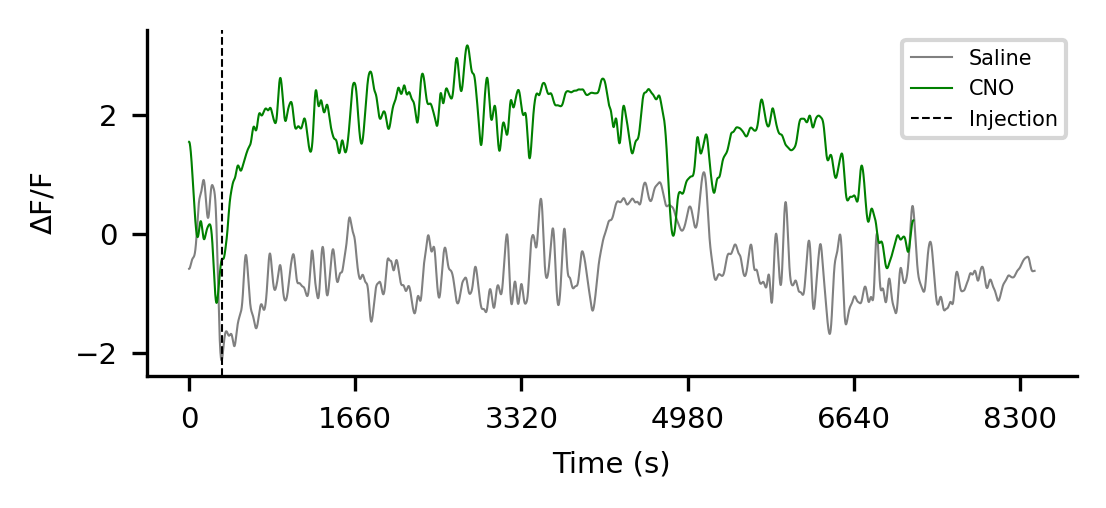

In [8]:
#DO NOT EDIT: set plotting parameters
fig, ax = plt.subplots(figsize=(4,1.5))
ax.spines[['right','top']].set_visible(False)
ax.set_ylabel(r'$\Delta$F/F')
ax.vlines(pre_injection_interval,  
           ymin = 0, ymax = 1, color = 'k', linewidth=linewidth, linestyle = '--', 
           transform=ax.get_xaxis_transform(), label='Injection')
ax.set_xlabel('Time (min.)')

#COMMEND OUT if you don't have a saline trace
ax.plot(saline_df_f_filt, linewidth=linewidth, color='lightgray',label='Saline')

#COMMENT OUT if you don't have a CNO trace
ax.plot(cno_df_f_filt, linewidth=linewidth, color='g',label='CNO', alpha=0.5)

#COMMENT OUT if you don't have a compound trace. If you do have a compound trace, replace 'Compound' with the name of your compound. 
ax.plot(cno_df_f_filt, linewidth=linewidth, color='b',label='Compound', alpha=0.5)

#DO NOT EDIT: set x axis labels and add legend
ax.set_xticklabels([int(val*freq) for val in ax.get_xticks()])
ax.legend(fontsize=5)

